# How to Load DiffusionDB?

This notebook shows three methods to download and use a subset of data from DiffusionDB.

## Method 1. Hugging Face Datasets Loader

We can use the Hugging Face [`Datasets`](https://huggingface.co/docs/datasets/quickstart) library to easily load prompts and images from DiffusionDB.

We pre-defined 16 DiffusionDB subsets (configurations) based on the number of instances. You can see all subsets in the [Dataset Preview](https://huggingface.co/datasets/poloclub/diffusiondb/viewer/all/train).

|Config name|Number of Images|Number of Prompts|Number of Parameters|Is Random|
|:---|---:|---:|---:|---:|
|`all`|2M|2M|2M|No|
|`first_1k`|1k|1k|1k|No|
|`first_5k`|5k|5k|5k|No|
|`first_10k`|10k|10k|10k|No|
|`first_50k`|50k|50k|50k|No|
|`first_100k`|100k|100k|100k|No|
|`first_500k`|500k|500k|500k|No|
|`first_1m`|1m|1m|1m|No|
|`random_1k`|1k|1k|1k|yes|
|`random_5k`|5k|5k|5k|yes|
|`random_10k`|10k|10k|10k|yes|
|`random_50k`|50k|50k|50k|yes|
|`random_100k`|100k|100k|100k|yes|
|`random_500k`|500k|500k|500k|yes|
|`random_1m`|1m|1m|1m|yes|
|`text_only`|0|2M|2M|No|

**Note:** If you only need prompts (no images), we recommend using Method 3 instead of the `text_only` configuration here. It is much faster and more flexible to load the meatadata Parquet table ourselves than using the Hugging Face's Datasets Generator.

**Note:** To use this Datsets Loader, you need to install Pillow by `pip install Pillow`.

In [7]:
import numpy as np
from PIL import Image
from datasets import load_dataset

# Load the dataset with the `random_1k` subset
dataset = load_dataset('poloclub/diffusiondb', 'random_1k')

Found cached dataset diffusiondb (/Users/jaywang/.cache/huggingface/datasets/poloclub___diffusiondb/random_1k/0.9.0/397f6f0fdaa2ba68593dcbd178e83e473d74d24ee8f85fbdb15e10aba429b08e)


  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# All data are stored in the `train` split
my_1k_data = dataset['train']
my_1k_data

Dataset({
    features: ['image', 'prompt', 'seed', 'step', 'cfg', 'sampler'],
    num_rows: 1000
})

portrait painting of a character of a modern warrior by cedric peyravernay and greg ruthkowski, in the style of dishonored concept art, concept design, trending on artstation 


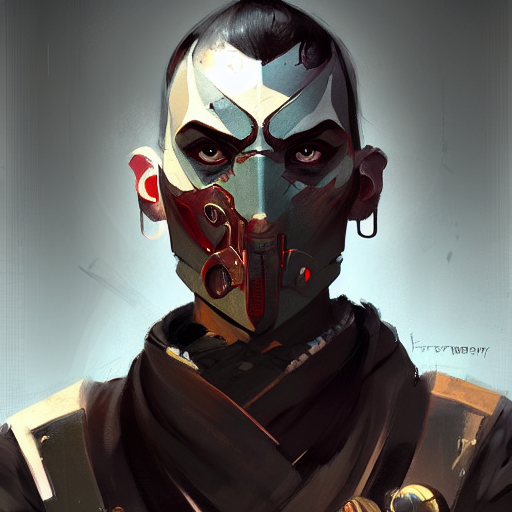

In [16]:
random_i = np.random.choice(range(my_1k_data.num_rows))

# Print out the prompt of this image
print(my_1k_data['prompt'][random_i])

# Display this image
image = my_1k_data['image'][random_i]
display(image)

## Method 2. Manually Download the Data

DiffusionDB uses a modularized file structure to organize images. The total 2 million images are split into 2,000 folders, where each folder has 1,000 images and a JSON file. Therefore, we can easily download a desired number of images with their prompts and hyperparameters.

All zip files have the following URL, where `{xxxxxx}` ranges from `000001` to `002000`.

`https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/images/part-{xxxxxx}.zip`


In [29]:
from urllib.request import urlretrieve
from json import load
from PIL import Image
from os.path import join

import numpy as np
import shutil


In [34]:
# Example to get data from part-000001
# Download part-000001.zip
part_id = 1
part_url = f'https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/images/part-{part_id:06}.zip'
urlretrieve(part_url, f'part-{part_id:06}.zip')

('part-000001.zip', <http.client.HTTPMessage at 0x145dc2fd0>)

In [25]:
# Unzip part-000001.zip
shutil.unpack_archive(f'part-{part_id:06}.zip', f'part-{part_id:06}')

{'p': 'symmetry!! a tiny cute chinese spring festival oriental tale mascot snake - phoenix toys, magic, intricate, smooth line, light dust, mysterious dark background, warm top light, hd, 8 k, smooth ， sharp high quality artwork in style of greg rutkowski, concept art, blizzard warcraft artwork, bright colors ', 'se': 75054762, 'c': 14.0, 'st': 50, 'sa': 'k_lms'}


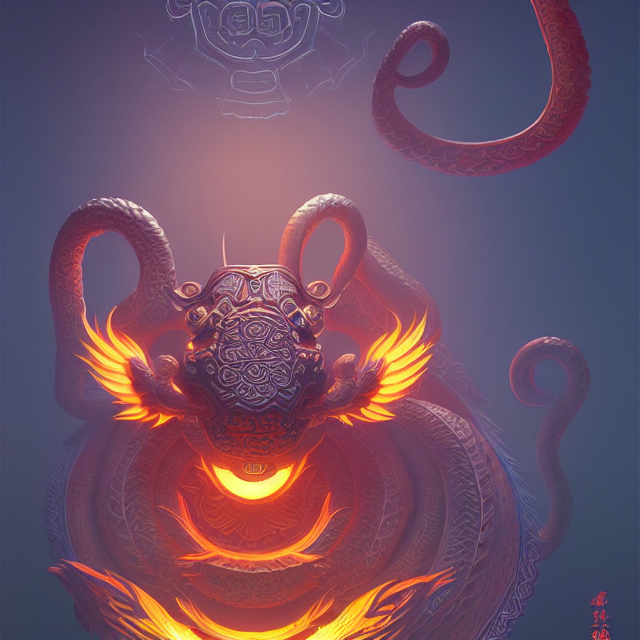

In [33]:
# Access the images and their prompts and hyperparameters
part_data = load(open(f'part-{part_id:06}/part-{part_id:06}.json', 'r', encoding='utf8'))

# Load the image
random_img_name = np.random.choice(list(part_data.keys()), 1)[0]
img = Image.open(join(f'part-{part_id:06}', random_img_name))

# Display the image with its prompt and hyperparameters
print(part_data[random_img_name])
display(img)


## Method 3. Use `metadata.parquet` (Text Only)

If our tasks do not require images, then we can easily access all 2 million prompts and hyperparameters in the `metadata.parquet` table.

In [36]:
from urllib.request import urlretrieve
import pandas as pd

In [37]:
# Download the parquet table
table_url = f'https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/metadata.parquet'
urlretrieve(table_url, 'metadata.parquet')

('metadata.parquet', <http.client.HTTPMessage at 0x146ce5a90>)

In [38]:
# Read the table using Pandas
metadata_df = pd.read_parquet('metadata.parquet')
print(metadata_df.shape)
metadata_df.head()

(2000000, 7)


,image_name,prompt,part_id,seed,step,cfg,sampler
0,ec9b5e2c-028e-48ac-8857-a52814fd2a06.png,"doom eternal, game concept art, veins and worm...",1,3312523387,50,7.0,3
1,cd2a819b-faff-410a-af58-b371bd03c587.png,a beautiful photorealistic painting of cemeter...,1,3602562681,50,15.0,8
2,baf9a21b-cdd0-4302-9fef-8435d7253981.png,"doom eternal, evangelion, game concept art, ve...",1,917080921,50,7.0,3
3,d64b60b0-e214-4ab4-a7f6-0172460201f4.png,"doom eternal, metro exodus, game concept art, ...",1,1006826059,50,7.0,3
4,c29ea381-ad6a-46b4-ada1-4224a7cbb676.png,"industrial architecture by zack snyder, atlant...",1,1609651727,50,15.0,8


Note that the `sampler` column has integer values. Each integer corresponds to one sampler. The mapping is shown below.

In [45]:
sampler_map = {
    1: "ddim",
    2: "plms",
    3: "k_euler",
    4: "k_euler_ancestral",
    5: "ddik_heunm",
    6: "k_dpm_2",
    7: "k_dpm_2_ancestral",
    8: "k_lms",
    9: "others",
}

In [44]:
# If we only need prompts, we can read the `prompt` column without reading the
# whole table!
prompts = pd.read_parquet('metadata.parquet', columns=['prompt'])
print(prompts.shape)
prompts.head()

(2000000, 1)


,prompt
0,"doom eternal, game concept art, veins and worm..."
1,a beautiful photorealistic painting of cemeter...
2,"doom eternal, evangelion, game concept art, ve..."
3,"doom eternal, metro exodus, game concept art, ..."
4,"industrial architecture by zack snyder, atlant..."
